In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             f1_score,
                             precision_score,
                             recall_score)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
SEED = 73
TEST_SIZE = 0.2
np.random.seed(SEED)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
x_sigmoid = np.linspace(-9, 9, 100)
y_sigmoid = sigmoid(x_sigmoid)

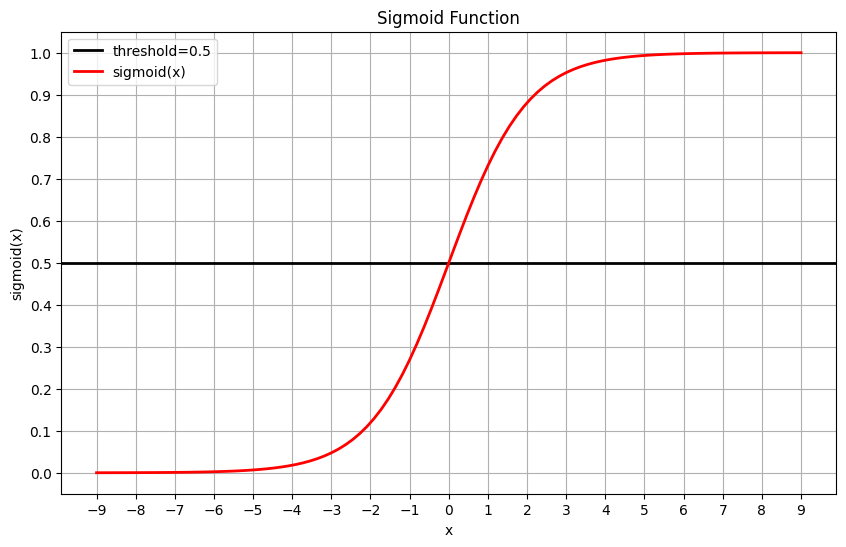

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Sigmoid Function')
ax.set_xlabel('x')
ax.set_ylabel('sigmoid(x)')
ax.grid(True)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.axhline(0.5, color='black', lw=2, label='threshold=0.5')
ax.plot(x_sigmoid, y_sigmoid, label='sigmoid(x)', lw=2, color='red')
plt.legend()

## Get data

In [6]:
csv_file = './data/heart_disease.csv'
df = pd.read_csv(csv_file)
print("# of rows: ", len(df))
df.head()

# of rows:  4238


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


* Sex: male or female(Nominal)
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Current Smoker: whether or not the patient is a current smoker (Nominal)
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
* **TenYearCHD (Target):** 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
print(df['TenYearCHD'].value_counts())

TenYearCHD
0    3594
1     644
Name: count, dtype: int64


<Axes: >

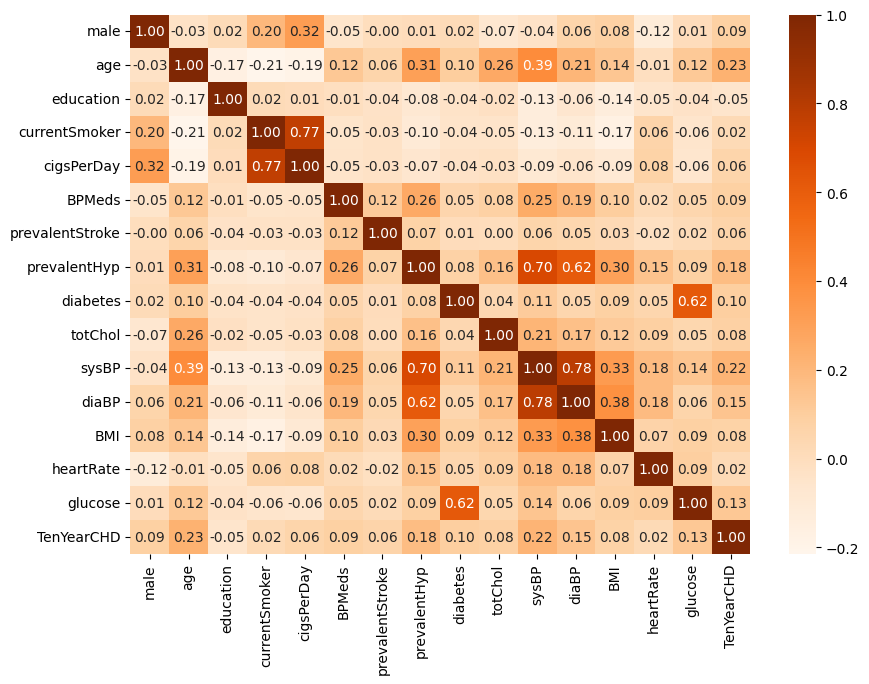

In [9]:
corr = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='Oranges', fmt='.2f')

## Get train and test data

In [10]:
df_y = df.TenYearCHD
df_x = df.drop(['TenYearCHD'], axis = 1)
df_x = df_x.drop(['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose'], axis = 1)

# df_x = df[['age', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'sysBP', 'diaBP']]
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=TEST_SIZE,
                                                                random_state=SEED)
print("# of train rows: ", len(df_x_train), len(df_y_train))
print("# of test rows: ", len(df_x_test), len(df_y_test))

# of train rows:  3390 3390
# of test rows:  848 848


### Dummy classifier

In [11]:
model_dummy = make_pipeline(StandardScaler(), DummyClassifier(strategy='most_frequent'))
model_dummy.fit(df_x_train, df_y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dummyclassifier', DummyClassifier(strategy='most_frequent'))])

In [12]:
score_dummy = model_dummy.score(df_x_test, df_y_test)
print(f'Score (dummy): {score_dummy:.4f}')

Score (dummy): 0.8608


In [13]:
df_pred_test = model_dummy.predict(df_x_test)
conf_matrix = confusion_matrix(df_y_test, df_pred_test)
accuracy = accuracy_score(df_y_test, df_pred_test)
precision_0 = precision_score(df_y_test, df_pred_test, pos_label=0)
precision_1 = precision_score(df_y_test, df_pred_test, pos_label=1)
recall_0 = recall_score(df_y_test, df_pred_test, pos_label=0)
recall_1 = recall_score(df_y_test, df_pred_test, pos_label=1)
f1_0 = f1_score(df_y_test, df_pred_test, pos_label=0)
f1_1 = f1_score(df_y_test, df_pred_test, pos_label=1)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision (0): {precision_0:.4f}')
print(f'Precision (1): {precision_1:.4f}')
print(f'Recall (0): {recall_0:.4f}')
print(f'Recall (1): {recall_1:.4f}')
print(f'F1 score (0): {f1_0:.4f}')
print(f'F1 score (1): {f1_1:.4f}')
print('Confusion matrix:')
print(conf_matrix)

Accuracy: 0.8608
Precision (0): 0.8608
Precision (1): 0.0000
Recall (0): 1.0000
Recall (1): 0.0000
F1 score (0): 0.9252
F1 score (1): 0.0000
Confusion matrix:
[[730   0]
 [118   0]]


/home/apollo/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Logistic regression

In [14]:
model_lr = make_pipeline(StandardScaler(),
                         LogisticRegression(
                                class_weight='balanced',
                                max_iter=1000,
                                C=1000.0,
                                penalty='l2',
                                solver='lbfgs',
                                random_state=SEED,
                        )
            )
model_lr.fit(df_x_train, df_y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1000.0, class_weight='balanced',
                                    max_iter=1000, random_state=73))])

In [15]:
score_lr = model_lr.score(df_x_test, df_y_test)
print(f'Score (logistic): {score_lr:.4f}')

Score (logistic): 0.6521


In [16]:
df_pred_test = model_lr.predict(df_x_test)
lr_conf_matrix = confusion_matrix(df_y_test, df_pred_test)
precision_0 = precision_score(df_y_test, df_pred_test, pos_label=0)
precision_1 = precision_score(df_y_test, df_pred_test, pos_label=1)
recall_0 = recall_score(df_y_test, df_pred_test, pos_label=0)
recall_1 = recall_score(df_y_test, df_pred_test, pos_label=1)
f1_0 = f1_score(df_y_test, df_pred_test, pos_label=0)
f1_1 = f1_score(df_y_test, df_pred_test, pos_label=1)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision (0): {precision_0:.4f}')
print(f'Precision (1): {precision_1:.4f}')
print(f'Recall (0): {recall_0:.4f}')
print(f'Recall (1): {recall_1:.4f}')
print(f'F1 score (0): {f1_0:.4f}')
print(f'F1 score (1): {f1_1:.4f}')
print(lr_conf_matrix)

Accuracy: 0.8608
Precision (0): 0.9223
Precision (1): 0.2342
Recall (0): 0.6507
Recall (1): 0.6610
F1 score (0): 0.7631
F1 score (1): 0.3459
[[475 255]
 [ 40  78]]


Text(0.5, 1.0, 'Confusion Matrix (Logistic Regression)')

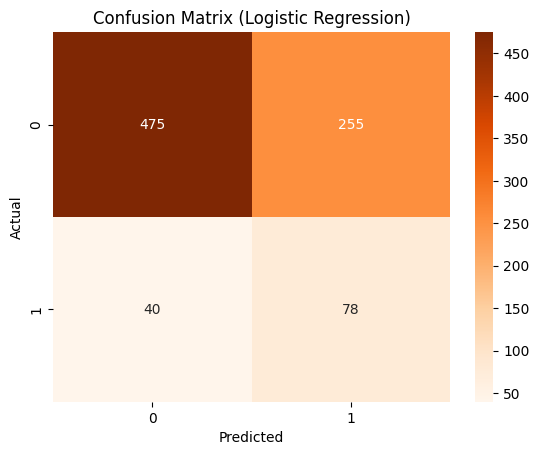

In [17]:
sns.heatmap(lr_conf_matrix, annot=True, cmap='Oranges', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')

## Train Gradient Boosting Classifier

In [22]:
model_gb = make_pipeline(StandardScaler(),
                         GradientBoostingClassifier(
                                n_estimators=1000,
                                learning_rate=0.01,
                                max_depth=3,
                                random_state=SEED,
                        )
            )
model_gb.fit(df_x_train, df_y_train)
score_gb = model_gb.score(df_x_test, df_y_test)
print(f'Score (gradient boosting): {score_gb:.4f}')

Score (gradient boosting): 0.8608


Accuracy: 0.8608
Precision (0): 0.8678
Precision (1): 0.5000
Recall (0): 0.9890
Recall (1): 0.0678
F1 score (0): 0.9245
F1 score (1): 0.1194
[[722   8]
 [110   8]]


Text(50.722222222222214, 0.5, 'Actual')

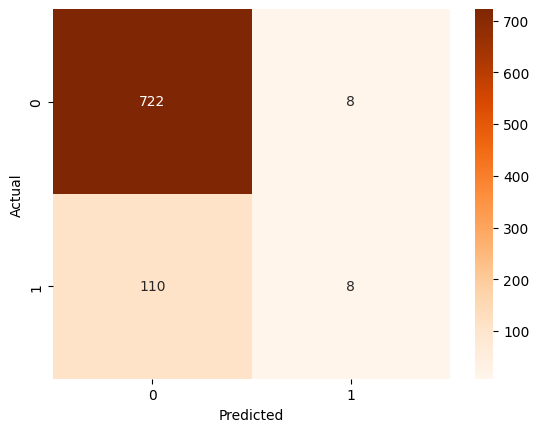

In [23]:
df_pred_test = model_gb.predict(df_x_test)
gb_conf_matrix = confusion_matrix(df_y_test, df_pred_test)
precision_0 = precision_score(df_y_test, df_pred_test, pos_label=0)
precision_1 = precision_score(df_y_test, df_pred_test, pos_label=1)
recall_0 = recall_score(df_y_test, df_pred_test, pos_label=0)
recall_1 = recall_score(df_y_test, df_pred_test, pos_label=1)
f1_0 = f1_score(df_y_test, df_pred_test, pos_label=0)
f1_1 = f1_score(df_y_test, df_pred_test, pos_label=1)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision (0): {precision_0:.4f}')
print(f'Precision (1): {precision_1:.4f}')
print(f'Recall (0): {recall_0:.4f}')
print(f'Recall (1): {recall_1:.4f}')
print(f'F1 score (0): {f1_0:.4f}')
print(f'F1 score (1): {f1_1:.4f}')
print(gb_conf_matrix)
sns.heatmap(gb_conf_matrix, annot=True, cmap='Oranges', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')